## Prelab 03 - Basic Radio Transmitter

#### Exercise 3.1
For a double sideband amplitude modulated waveform with a carrier frequency of $100$ kHz and a maximum modulating signal frequency of $5$ kHz, determine (a) the frequency limits for the upper and lower sidebands, (b) the bandwidth, and (c) sketch the output frequency spectrum.

a) Upper and lower sideband limits are 100khz +- 5kHz and -100khz +- 5khz

b) The bandwidth of the signal centered at 100khz is 10khz. the total bandwidth is 110khz

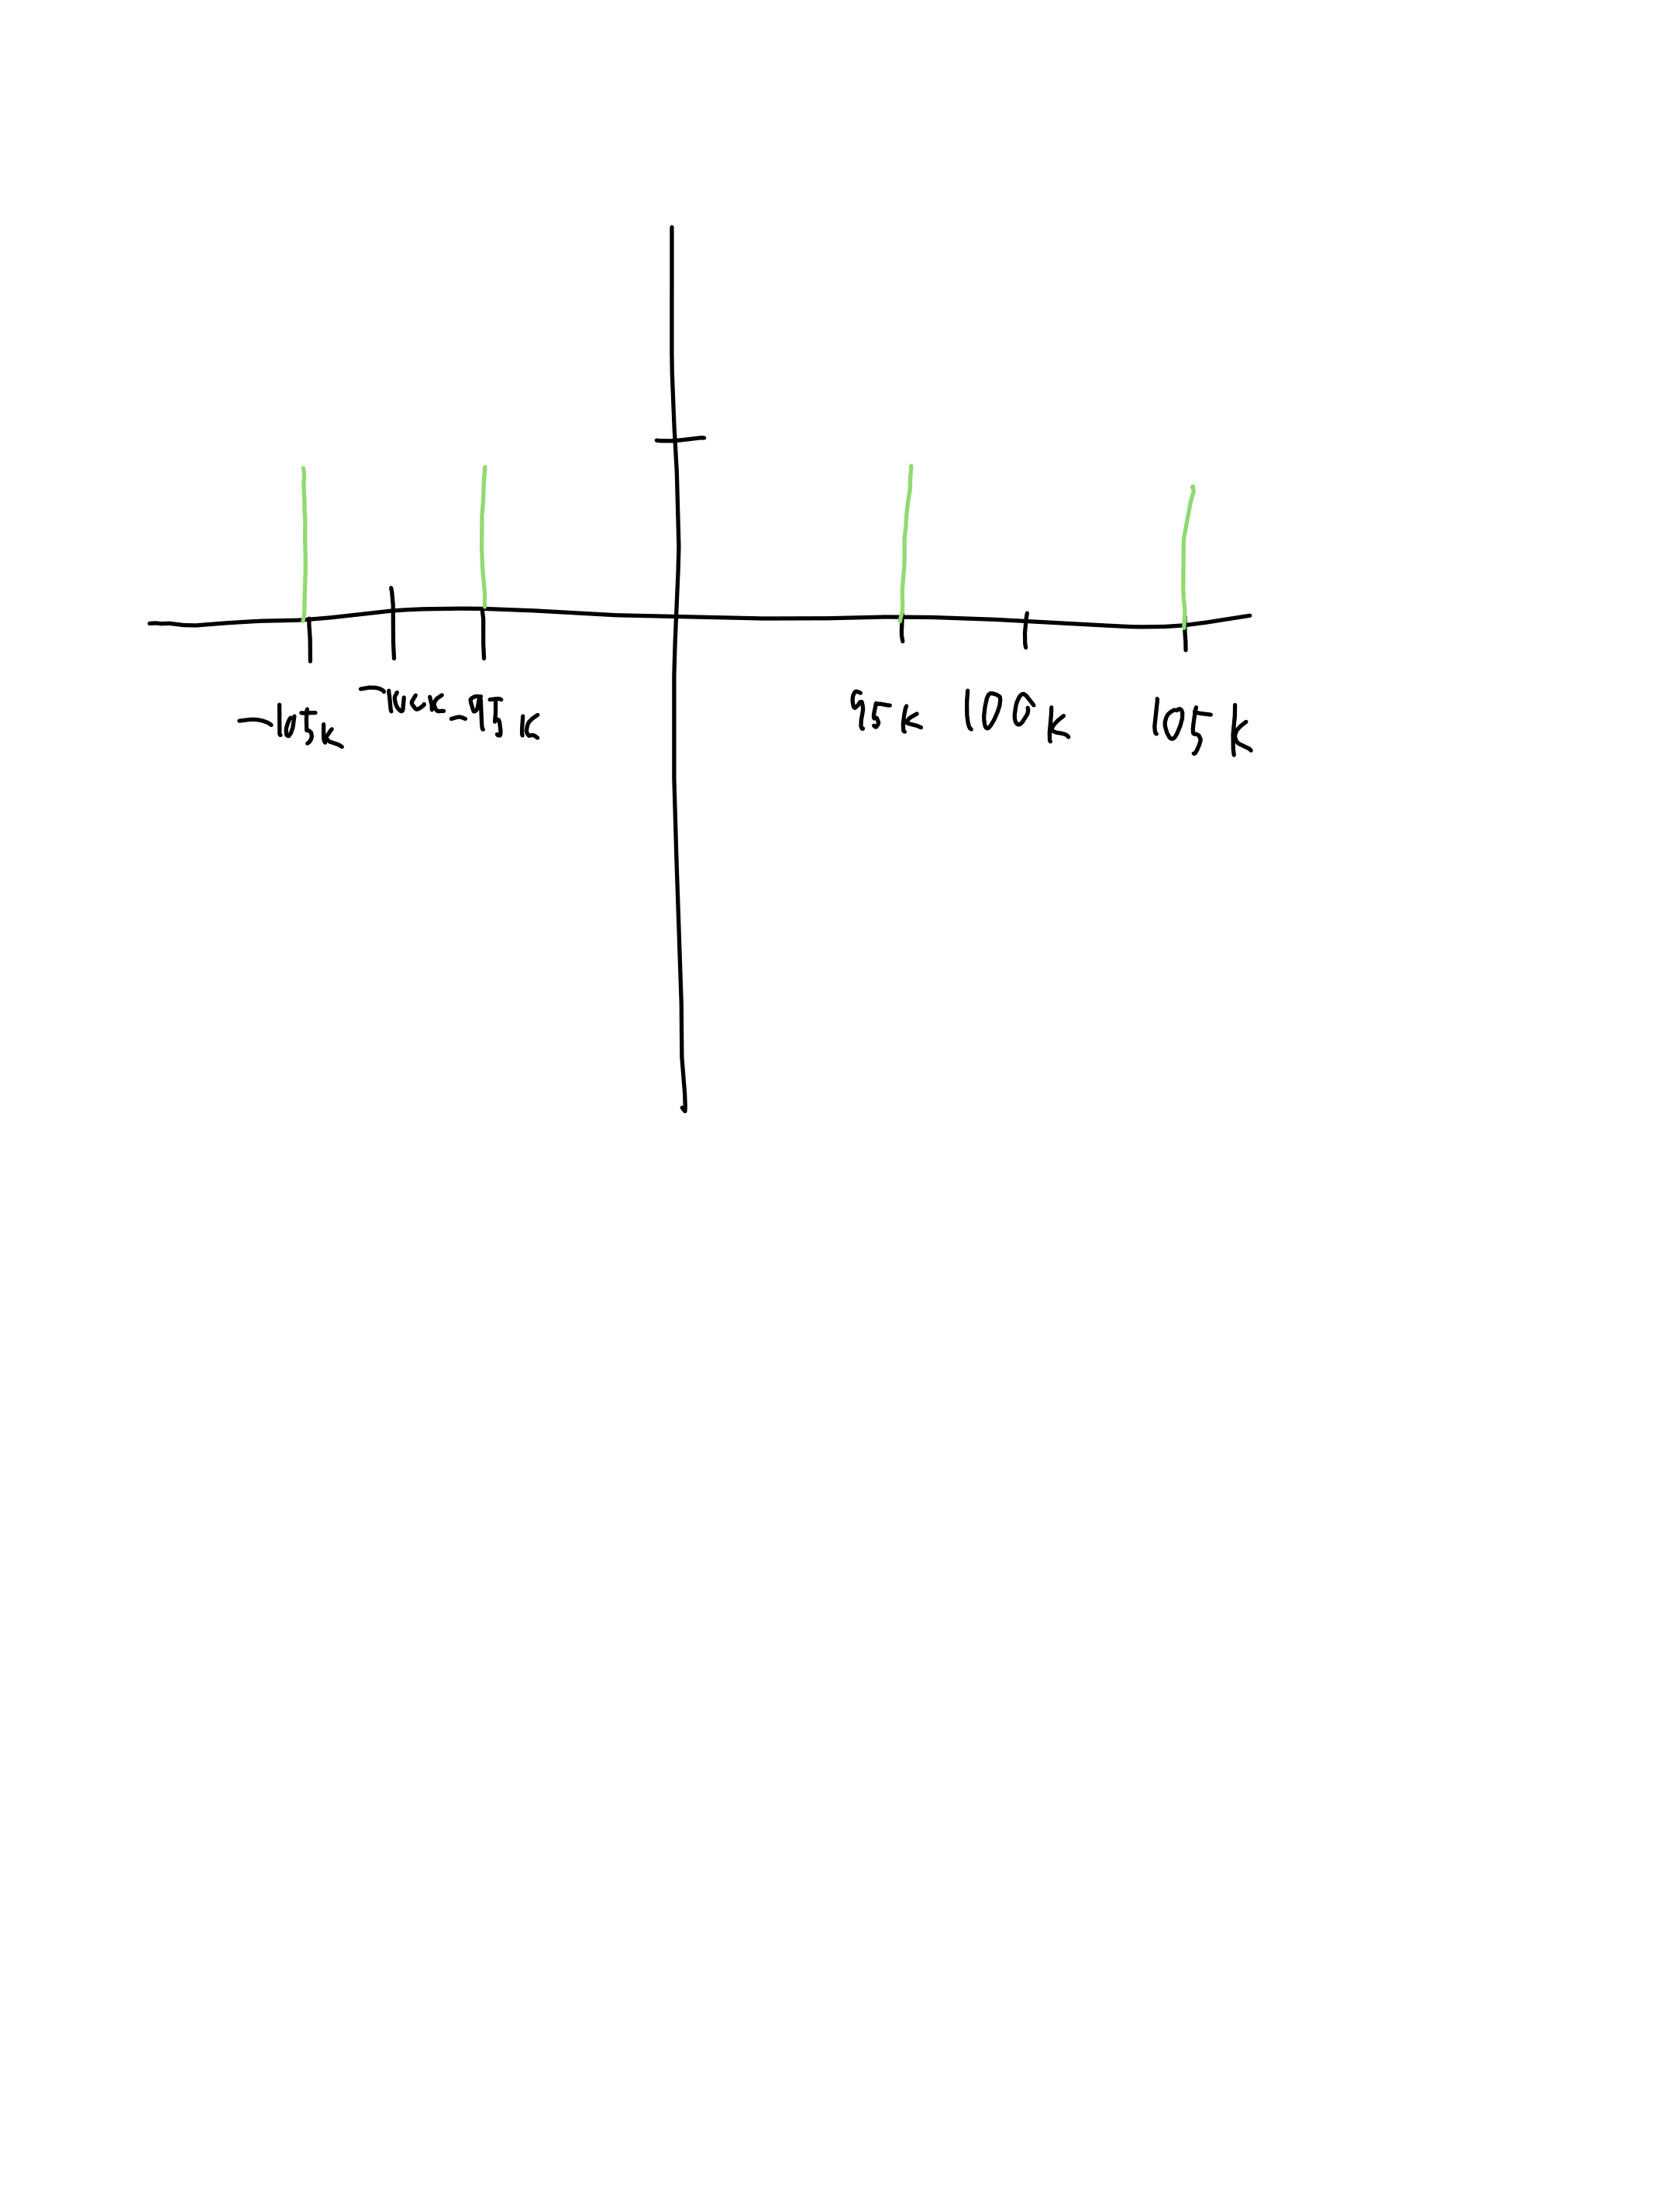


#### Exercise 3.2
Building from the exercises in Prelab 01, implement Exercise 3.1 in Python and produce fully-labeled plots of the waveform in the time domain and frequency domain. Justify your choices of the effective sampling rate and frequency resolution of these plots.


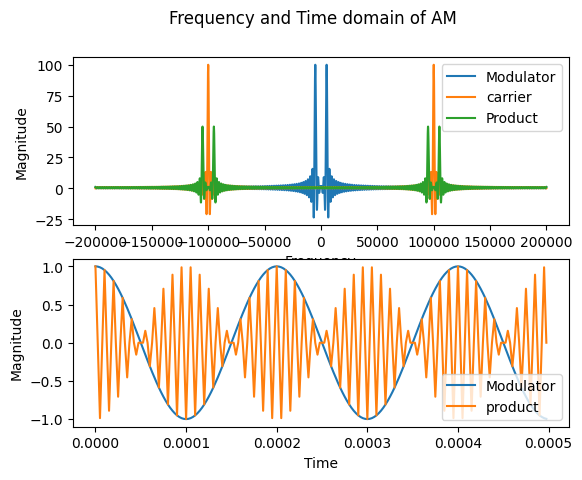

In [3]:
import matplotlib.pyplot as plt
import numpy as np


#fourier series math from 3.2

def coeff_gen(k):
    return 0.25 if k == 0 else ((1-np.cos((np.pi*k)/2) + 1j*np.sin((np.pi*k)/2))/(1j*2*np.pi*k)) #return function from question 1.5a

def coeff_cos(k):
    if (k == 1) or (k == -1):
          return 0.5
    else:
        return 0

def fseries(K,a,f_0,f_s,t):
	y_K = np.zeros(np.size(t), dtype=complex)
	
	#loop through, keeping index
	for index, coeff in enumerate(a):

		#translate index to k
		k = index-K #subtract k to convert e.g. at index 0, k = -K

		T_0 = 1/f_0

		#copy formula, adding to y_K
		y_K += coeff * np.exp(1j*((2*np.pi*k)/(T_0)) * t)

	return y_K

# parameters
K = 4000   #number of frequency bins
f_01 = 100e3    #carrier
f_02 = 5e3      #signal
f_s = 400e3    #sampling frequency
duration = 0.0005 #length in time

t = np.arange(0, duration, 1/f_s)

# generate coefficients
a_k1 = [coeff_cos(k-K) for k in range(K*2 + 1)]
a_k2 = [coeff_cos(k-K) for k in range(K*2 + 1)]

# generate time domain signals
c_t = fseries(K, a_k1, f_01, f_s, t)
m_t = fseries(K, a_k2, f_02, f_s, t)

# combine carrier and signal

s_t = m_t*c_t

#get frequency domain of these signals

f = np.fft.fftshift(np.fft.fftfreq(K)) * f_s #frequency spectrum
m_f = np.fft.fftshift(np.fft.fft(m_t, K))
c_f = np.fft.fftshift(np.fft.fft(c_t, K))
s_f = np.fft.fftshift(np.fft.fft(s_t, K))



#plot

fig, axs = plt.subplots(2)
fig.suptitle('Frequency and Time domain of AM')
axs[0].plot(f, m_f, label="Modulator")
axs[0].plot(f, c_f, label="carrier")
axs[0].plot(f, s_f, label="Product")
axs[0].set(xlabel="Frequency", ylabel="Magnitude")
axs[0].legend()
axs[1].plot(t, m_t.real, label="Modulator")
axs[1].plot(t, s_t.real, label= "product")
axs[1].set(xlabel="Time", ylabel="Magnitude")
axs[1].legend()

plt.show()

#### Exercise 3.3
Instead of downconverting all the way to baseband, suppose a radio-frequency (RF) input tone at $f_{\mathrm{rf}} = 1800~\text{MHz}$ is to be downconverted in a mixer to an intermediate frequency (IF) of $f_{\mathrm{if}} = 87~\text{MHz}$.

More specifically, let
$$
x_{\mathrm{rf}}(t)=A\cos(2\pi f_{\mathrm{rf}}t), \qquad c(t)=\cos(2\pi f_{\mathrm{lo}}t),
$$
and form the mixer output
$$
y(t)=x_{\mathrm{rf}}(t)c(t).
$$
This multiplication produces sum and difference frequency components at $f_{\mathrm{rf}}+f_{\mathrm{lo}}$ and $|f_{\mathrm{rf}}-f_{\mathrm{lo}}|$. The desired IF is
$$
f_{\mathrm{if}}=\left|f_{\mathrm{rf}}-f_{\mathrm{lo}}\right|.
$$
For a given choice of $f_{\mathrm{lo}}$, the **RF image frequency** $f_{\mathrm{im}}$ is the *other* RF input frequency that would also downconvert to the same IF, i.e.,
$$
\left|f_{\mathrm{im}}-f_{\mathrm{lo}}\right|=f_{\mathrm{if}}.
$$

Find the two possible local oscillator frequencies $f_{\mathrm{lo}}$ that yield $f_{\mathrm{if}}=87~\text{MHz}$ when $f_{\mathrm{rf}}=1800~\text{MHz}$, and for each $f_{\mathrm{lo}}$ determine the corresponding RF image frequency $f_{\mathrm{im}}$.

$f_{\mathrm{lo1}} = 1713 MHz$, with corresponding $f_{\mathrm{im}} = 1626 MHz$

$f_{\mathrm{lo1}} = 1887 MHz$, with corresponding $f_{\mathrm{im}} = 1974 MHz$

#### Exercise 3.4
Assume that a message signal is given by
$𝑚(𝑡) = 4 \cos(2\pi 𝑓_𝑚 𝑡) + \cos(4\pi 𝑓_𝑚 𝑡).$
Determine a simplified expression for
$$𝑥_𝑐 (𝑡) = \frac{1}{2} 𝐴_𝑐 𝑚(𝑡) \cos(2\pi𝑓_𝑐 𝑡) \pm \frac{1}{2} 𝐴_𝑐 \hat{m}(𝑡) \sin(2\pi 𝑓_𝑐 𝑡)$$
for $𝐴_𝑐 = 10$, where $\hat{m}(𝑡) = 4 \sin(2\pi 𝑓_𝑚 𝑡) + \sin(4\pi 𝑓_𝑚 𝑡)$ is the Hilbert transform of $m(t)$. Argue, by sketching the spectra, that the result is upper-sideband or lower-sideband SSB depending upon
the choice of the $\pm$ sign.

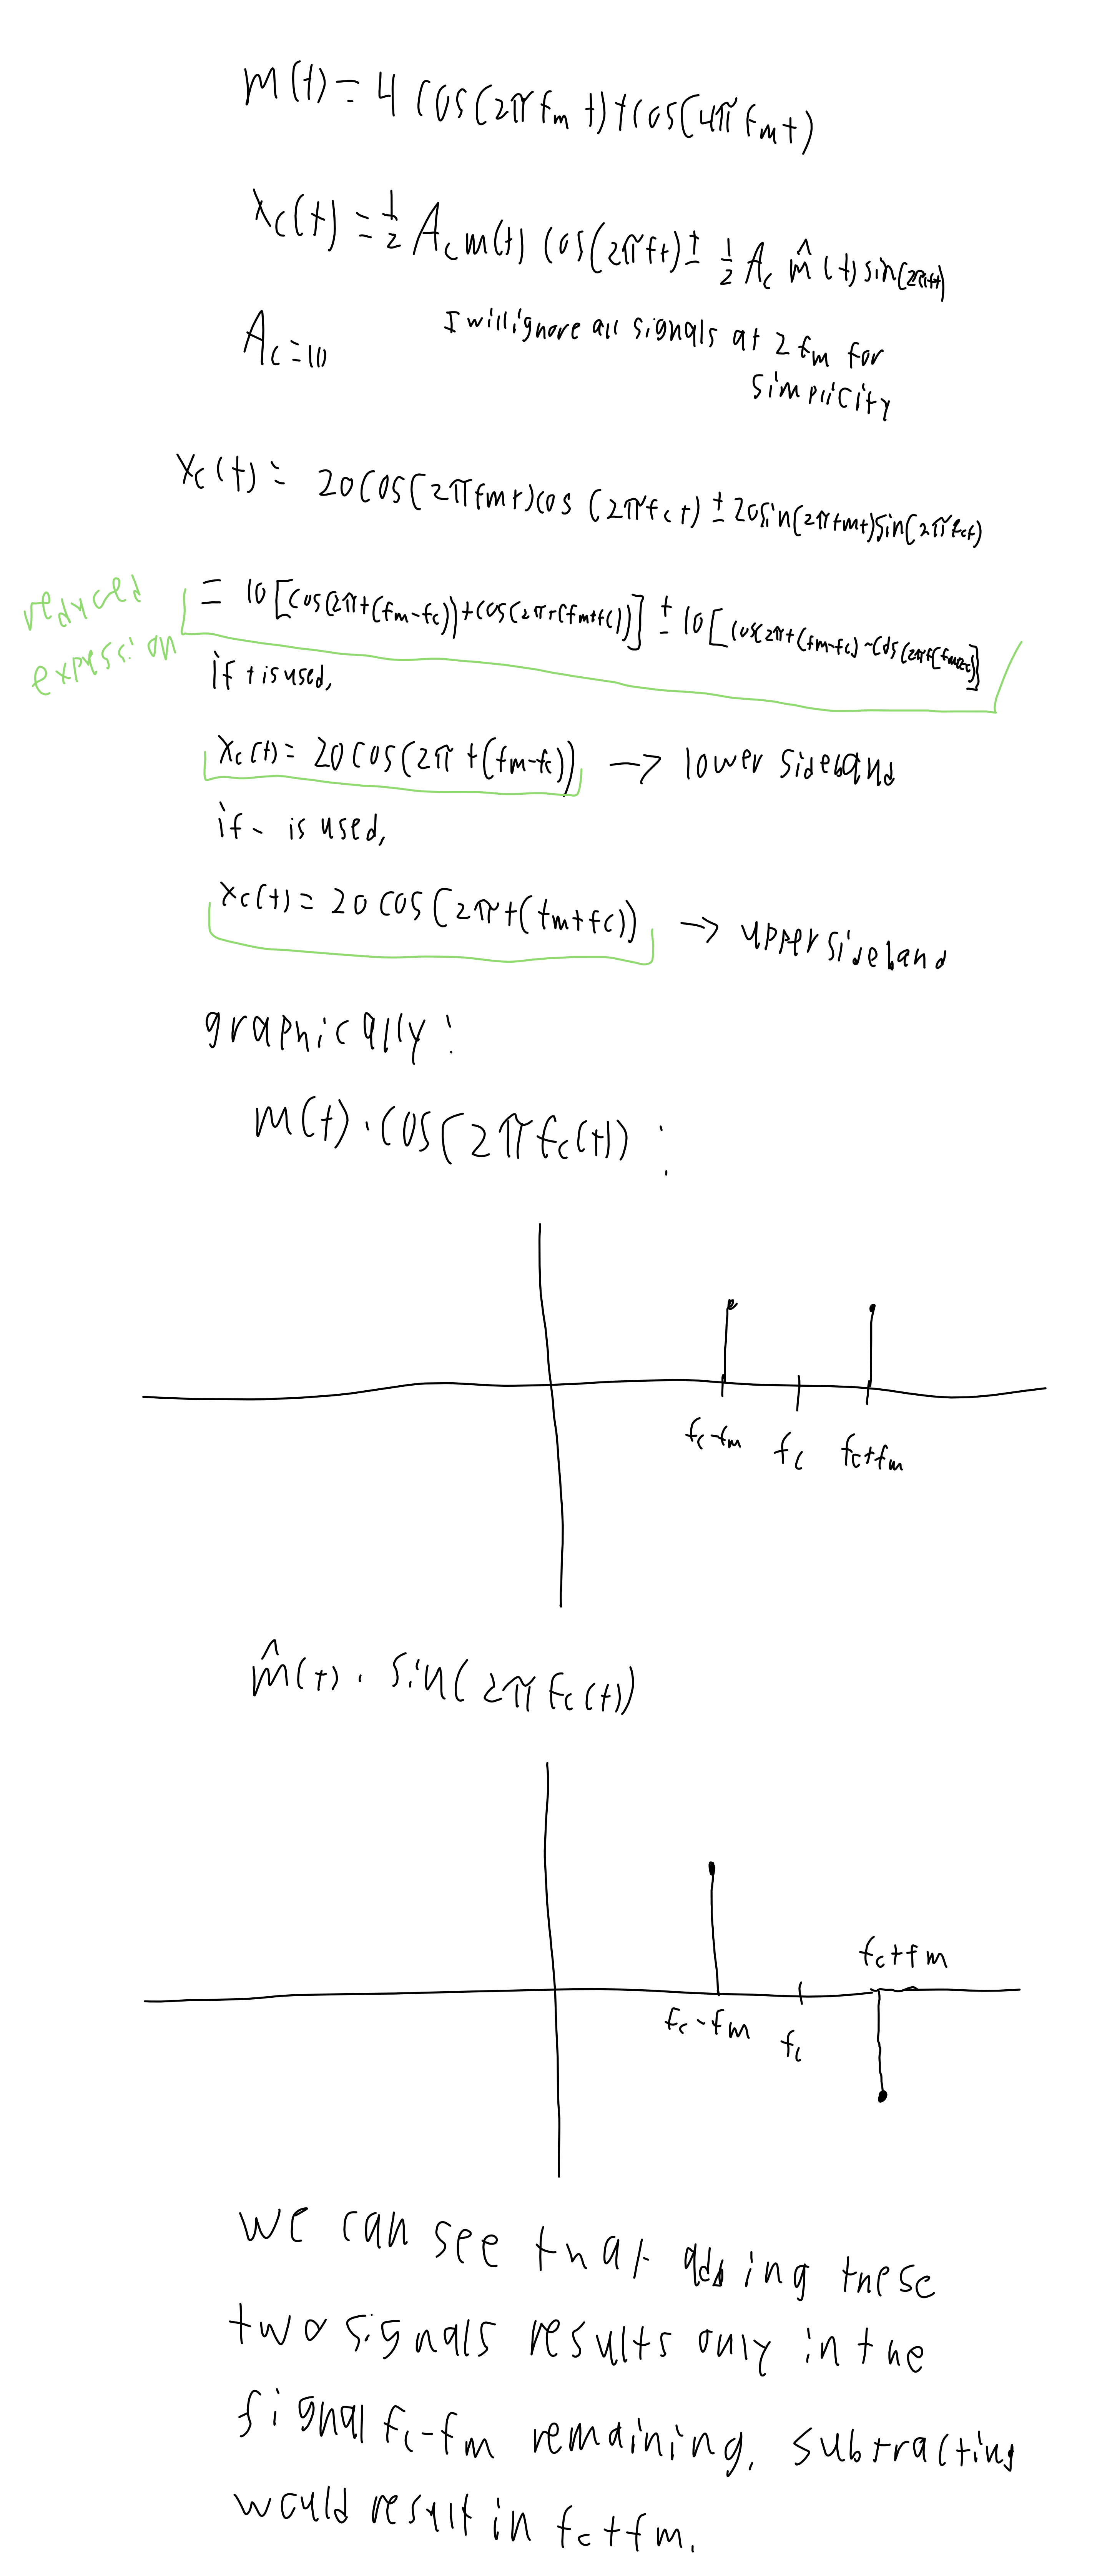

#### Exercise 3.5
Suppose that a DSB-SC signal $x(t) = m(t) \cos(2\pi f_c t)$ is applied to one input of a mixer, and that a local oscillator signal $c(t) = 2\cos ( 2\pi f_c t ) $ is applied to the other input. The resulting output signal is $$y(t) = [x(t) + \alpha c(t)] c(t),$$ where $\alpha$ is the self-mixing factor. 

(a) Determine a general expression for $Y(f)$ in terms of $X(f)$.

The result is $Y(f) = X(f + f_c) + X(f - f_c) + 2\alpha\delta (f) + \alpha\delta(f-2f_c) + \alpha\delta(f+2f_c)$

where the first two terms are from the input x(t), the third term represents a dc offseet cuased by self mixing, and the last two terms represent the stray sinusoid from self-mixing

(b) Draw a sketch of the Fourier transform of $y(t)$ for $M(f)$ shown below.

<img src="Images/m_of_f.jpg" alt="Modulating signal M(f)" style="width:30%;">

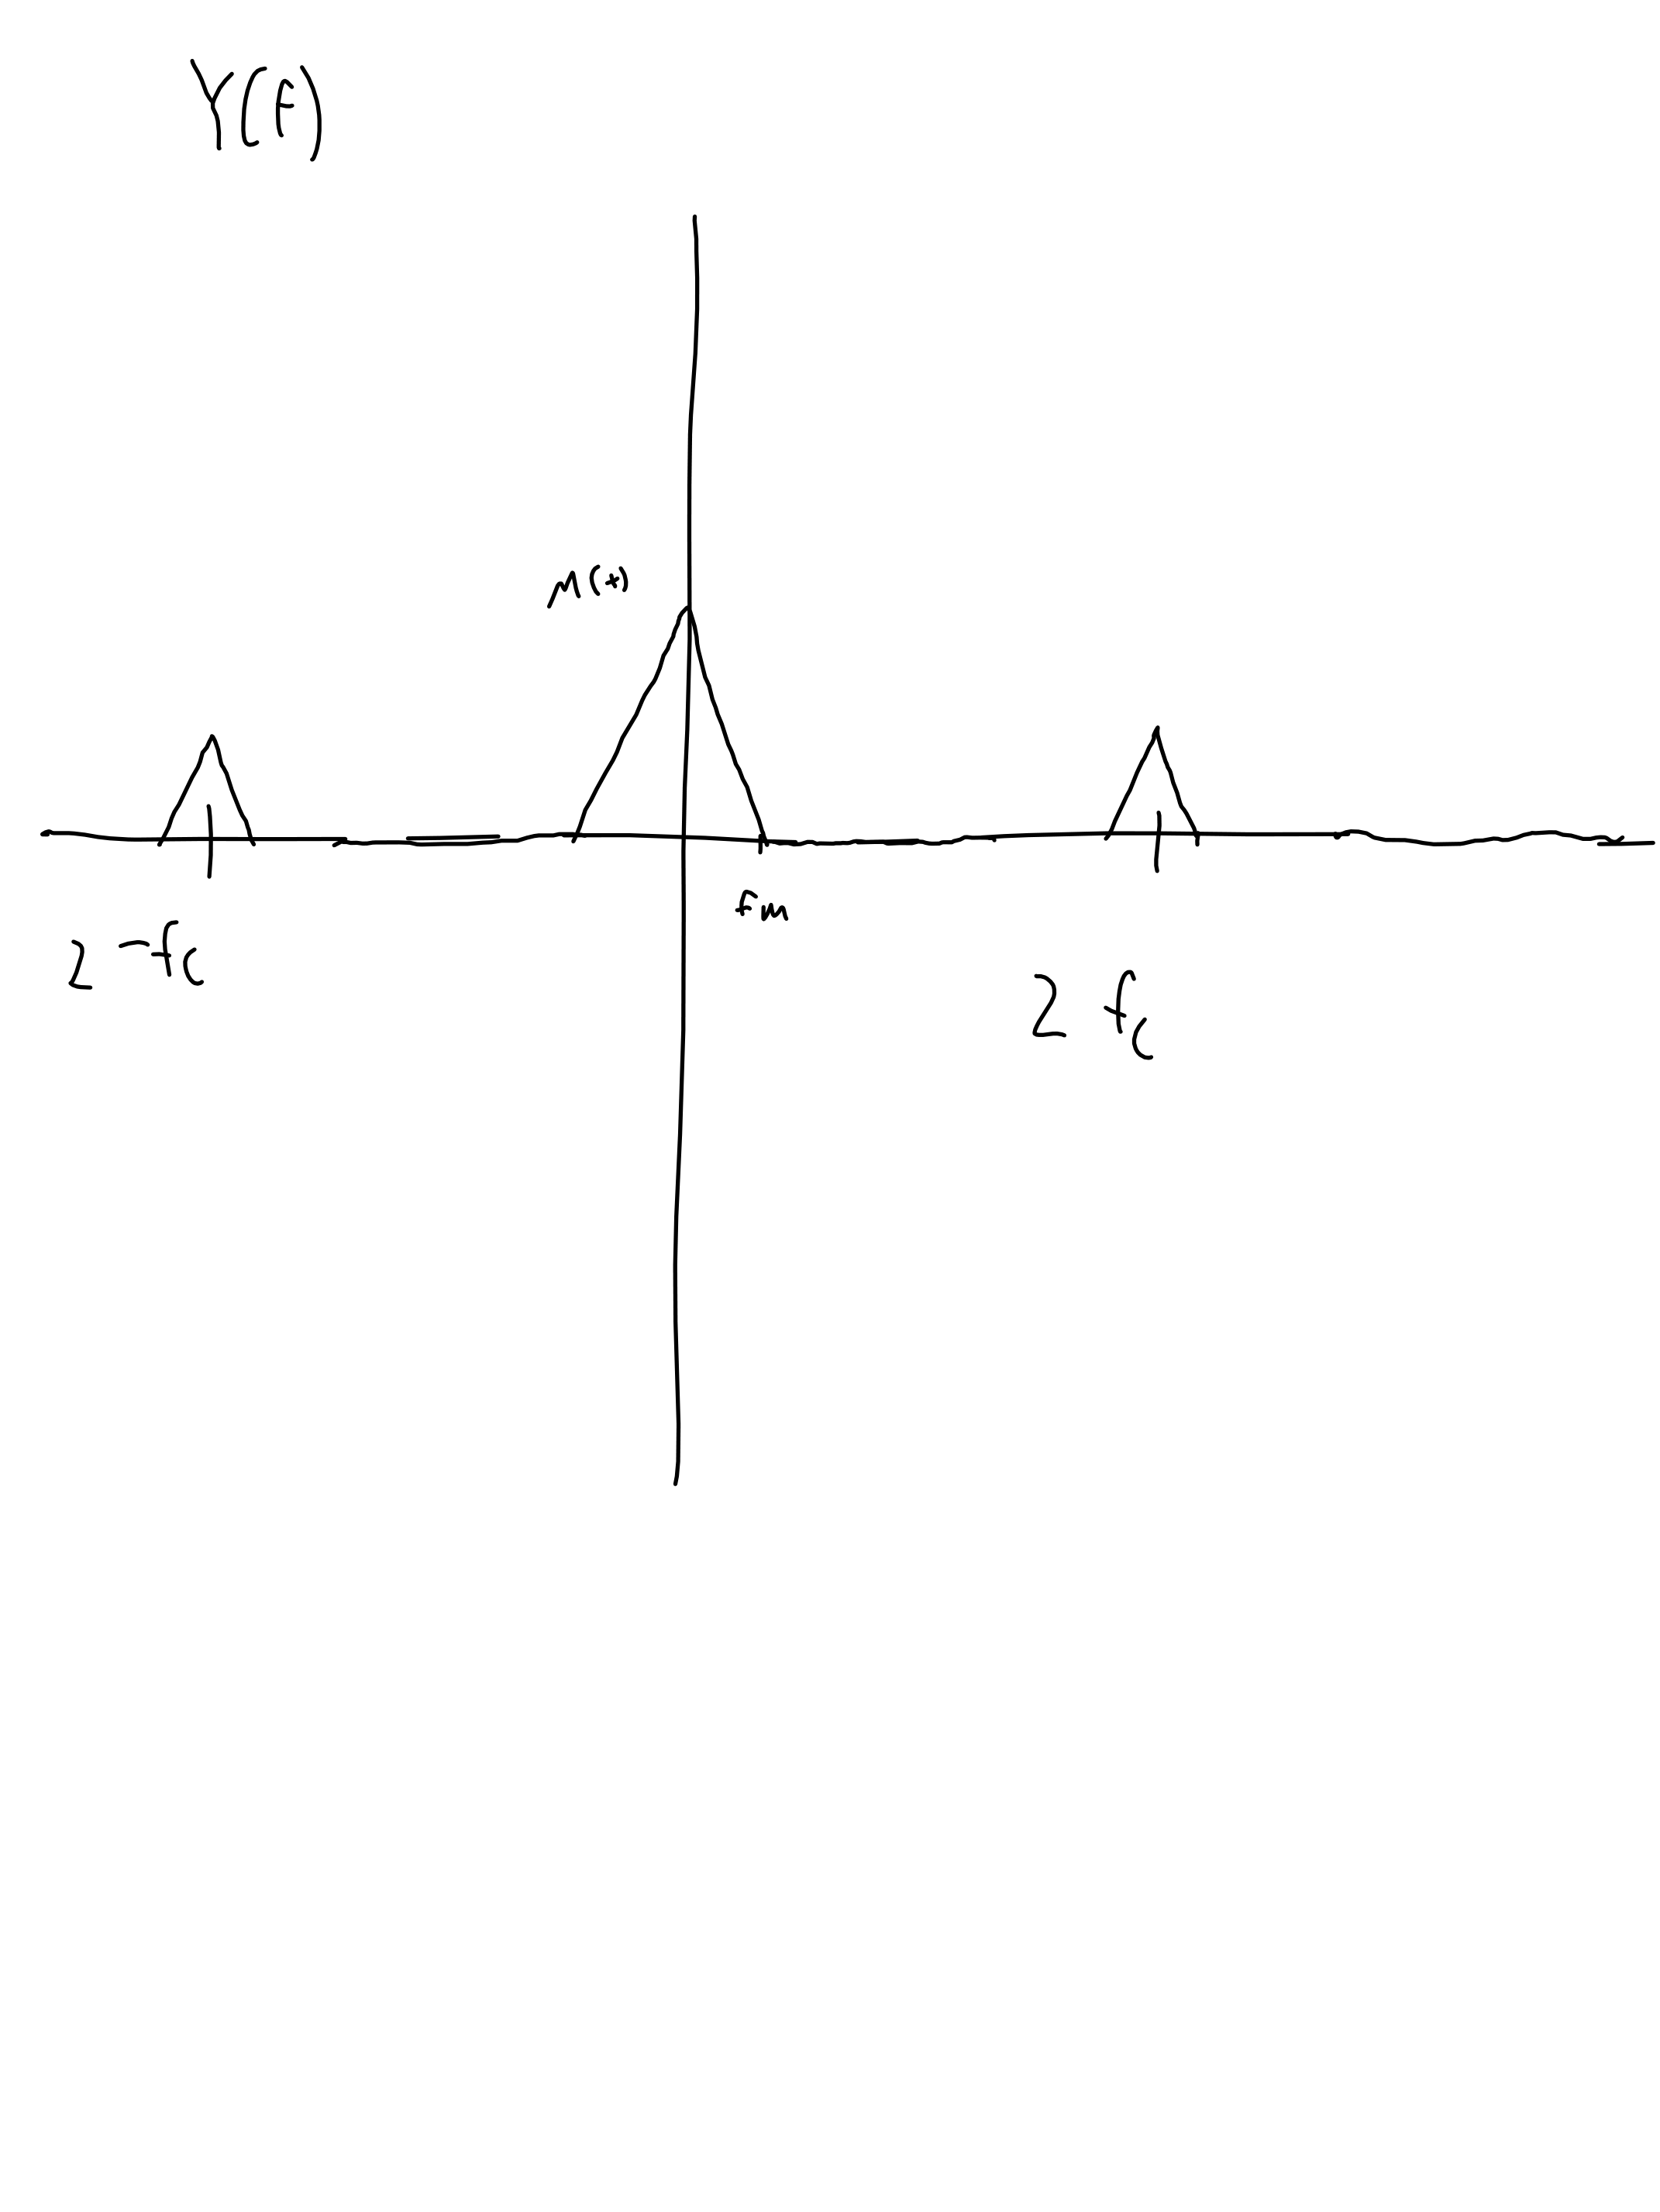

(c) Assume the DC offset of $m(t)$ is zero. Determine the value of DC offset of the output signal.

if DC offset of m(t) is zero, the resulting DC offset is $2\alpha$

(d) If $f_m$ is the maximum frequency component of $m(t)$ and you want to fully emulate the behavior of this mixer in a computer, what would be the minimum sampling rate required?

The highest signal in the output of the mixer is at $2f_c + f_m$. To fully replicate the behavior of this mixer, we must sample at twice that, or $4f_c + 2f_m$


#### Exercise 3.6
At a distance of $300$ m from an antenna operating at $5.8$ GHz, the radiated power density in the main beam is measured to be $7.5 \times 10^{-3}$ W/$m^2$. If the input power to the antenna is known to be $85$ W, find the gain of the antenna.

$radiated power = \frac{P_t\cdot G}{4\pi r^2}$

$7.5 \cdot10^{-3} = \frac{85\cdot G}{4\pi r^2}$

$G = 99.79$



#### Exercise 3.7

The instantaneous electric field components of an elliptically polarized wave propagating along the $z$ axis
are $\mathscr{E}_x = E_1 \cos(2\pi f t - \beta z)$ and $\mathscr{E}_y= E_2 \cos (2\pi f t - \beta z + \delta)$. Specify $E_1, E_2$, and $\delta$ for the following polarizations:

(a) Linear with $E_1 \neq 0$ and $E_2 \neq 0$.

$E1, E2 > 0$ 

$\delta = 0 or \delta = \pi$

in this configuration, E1 and E2 are in phase. The resulting wave will only have a linear component due to symmetry. The values of E1 and E2 specify the angle.

(b) Right circular.

$E1 = E2$

$\delta = -\pi/2$

(c) Left circular.

$E1 = E2$

$\delta = \pi/2$


#### Exercise 3.8

A $\lambda/2$ dipole antenna, with a total loss resistance of $1$ Ohm, is connected to a generator whose internal impedance is $50+j25$ Ohms. Assuming that the peak voltage of the generator is $2$ V and the impedance of the dipole, excluding the loss resistance, is $73+j42.5$ ohms. Find the power

(a) Supplied by the source (real)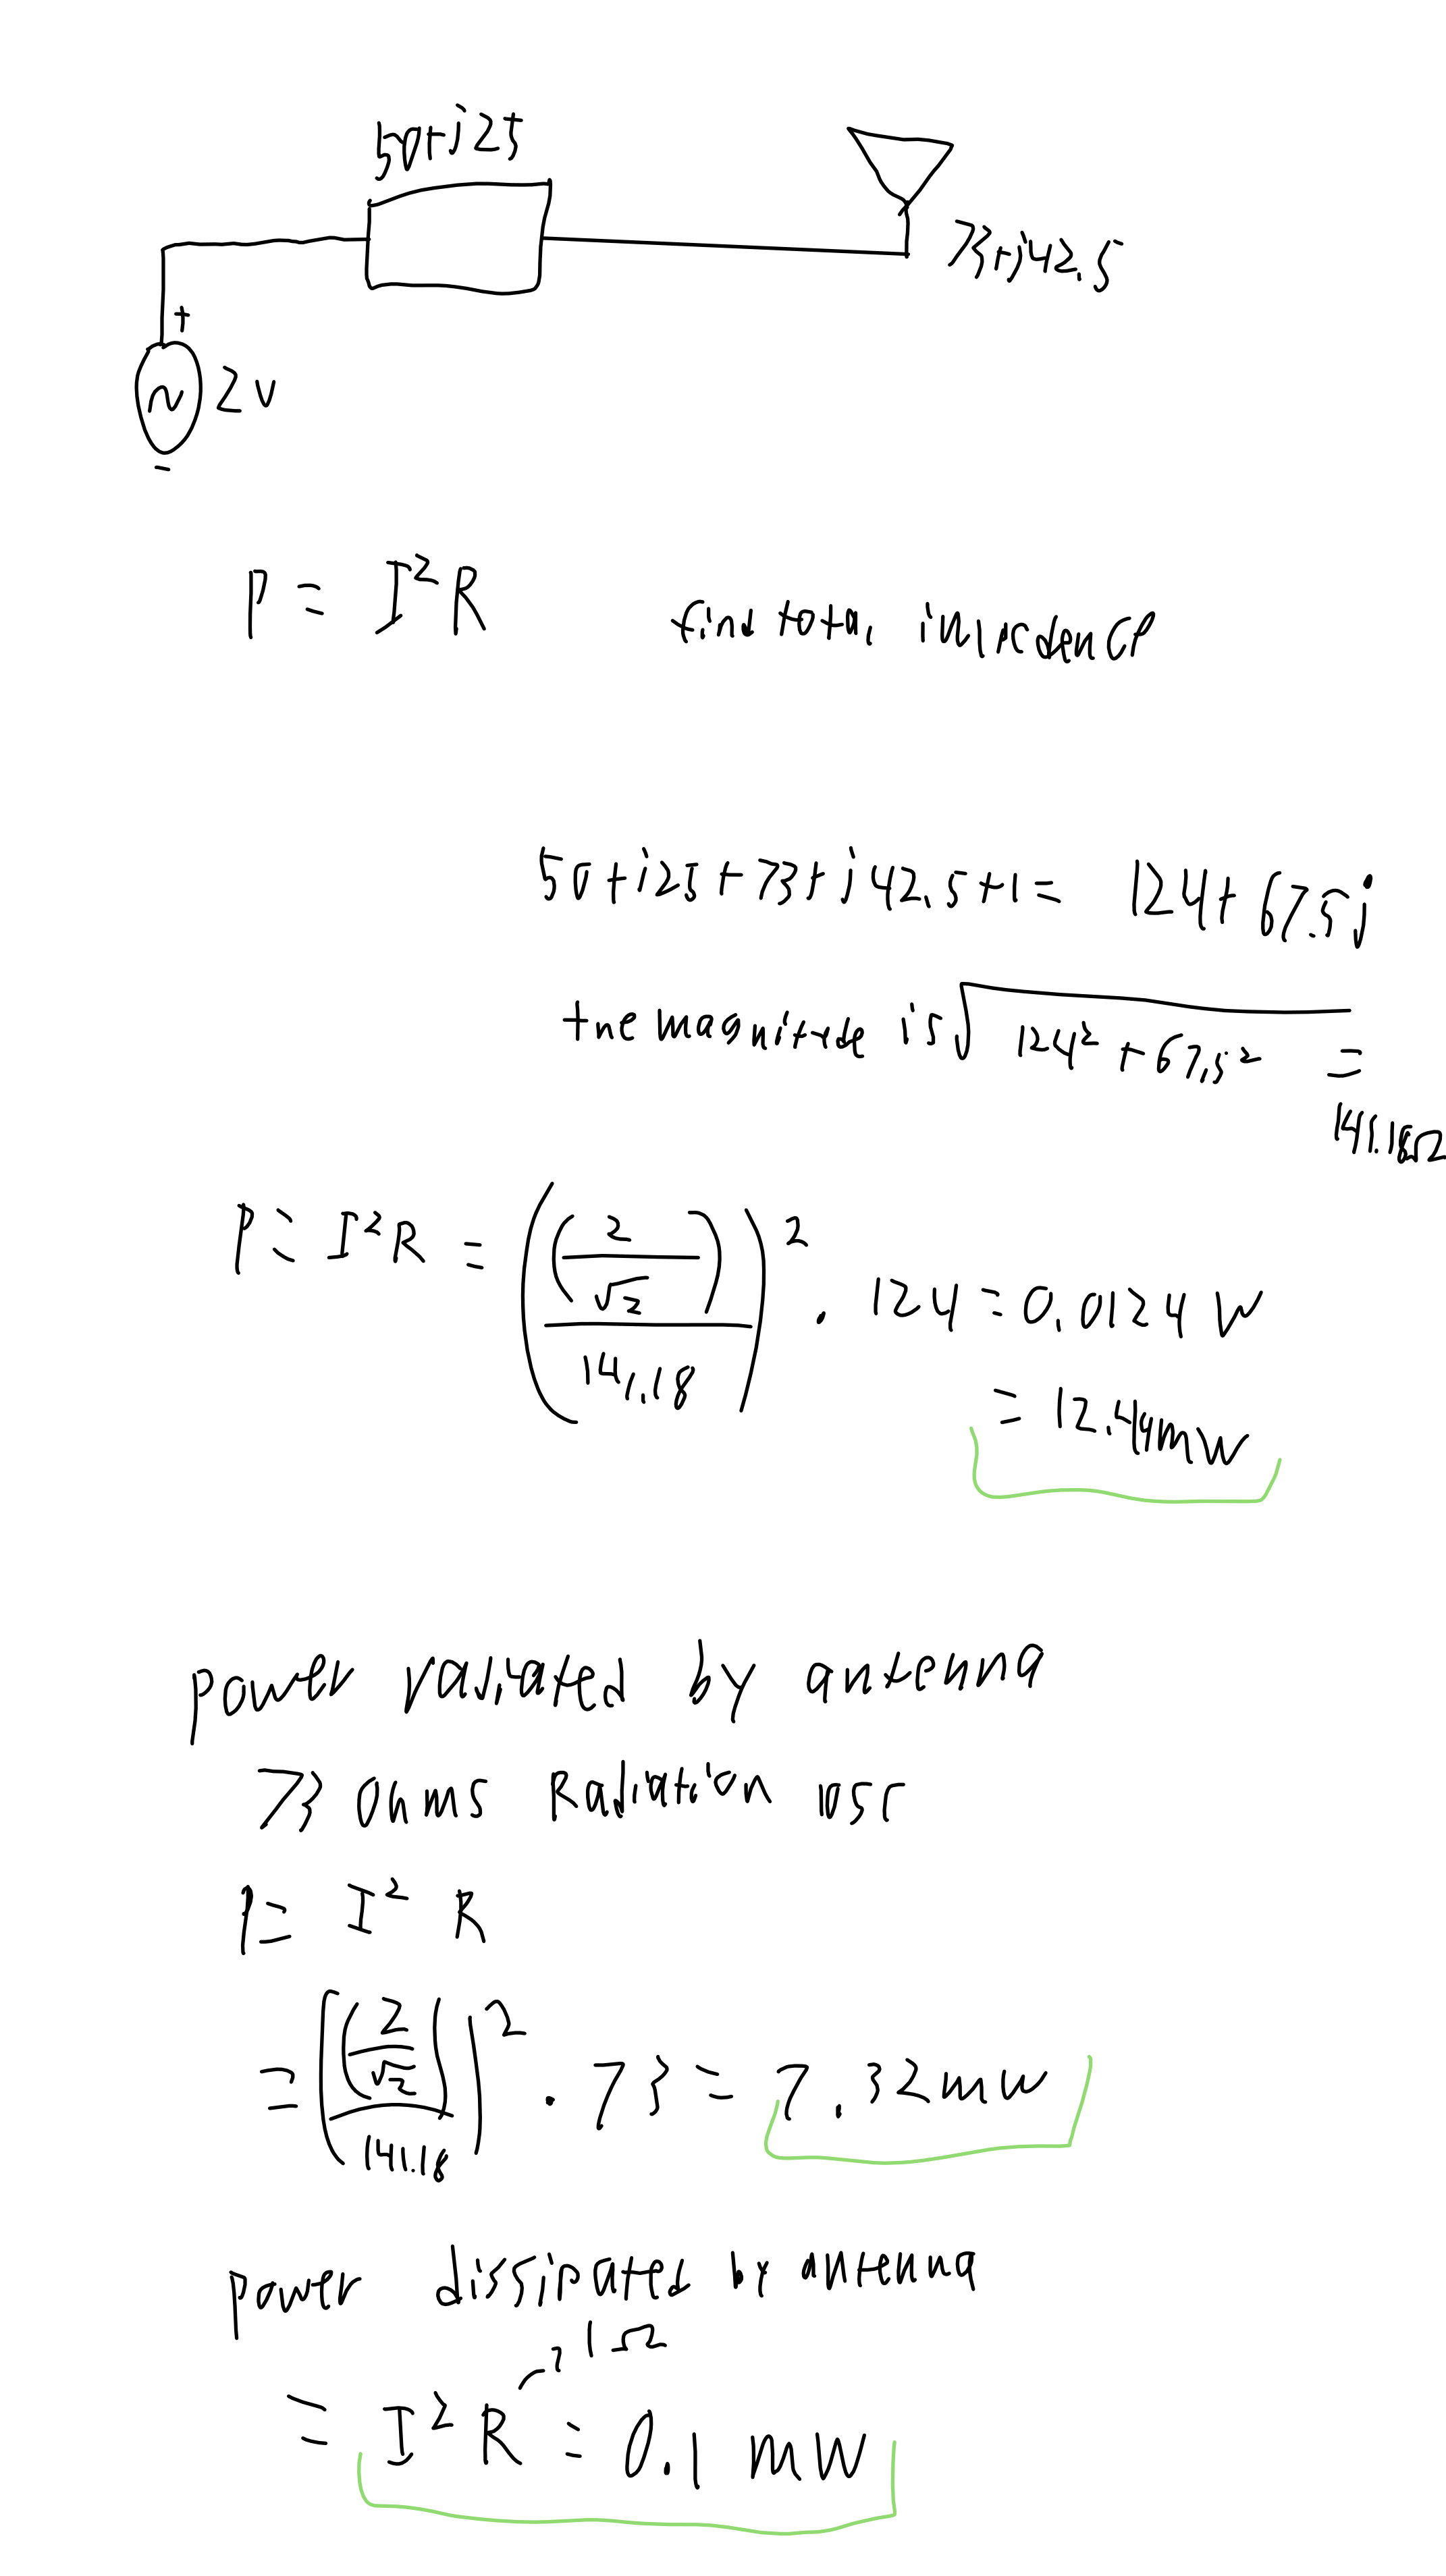

(b) Radiated by the antenna

(c) Dissipated by the antenna
